<a href="https://colab.research.google.com/github/mariabandeira/Reconhecimento-de-Digitos/blob/main/MiniProjeto_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconhecimento de Dígitos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# caminho dos arquivos CSV
file_train = 'https://raw.githubusercontent.com/mariabandeira/Reconhecimento-de-Digitos/main/dataset_digits/train.csv'
file_test = 'https://raw.githubusercontent.com/mariabandeira/Reconhecimento-de-Digitos/main/dataset_digits/test.csv'

# Lendo o CSV
X_train = pd.read_csv(file_train, sep=';')
X_test = pd.read_csv(file_test, sep=';')

# Exibindo as primeiras linhas dos DataFrames
print(X_train.head())
print(X_test.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      0       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      0       0       0       0       0       0       0       0       0   
3      0       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2186 entries, 0 to 2185
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 13.1 MB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 6.7 MB


In [ ]:
X_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,2186.000000,2186.0,2186.0,2186.0,2186.0,2186.0,2186.0,2186.0,2186.0,2186.0,...,2186.0,2186.0,2186.0,2186.0,2186.0,2186.0,2186.0,2186.0,2186.0,2186.0
mean,2.651418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.015090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,1115.000000,1115.0,1115.0,1115.0,1115.0,1115.0,1115.0,1115.0,1115.0,1115.0,...,1115.0,1115.0,1115.0,1115.0,1115.0,1115.0,1115.0,1115.0,1115.0,1115.0
mean,2.693274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.010542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train['label'].value_counts()

,count
label,
1,608
4,577
5,576
0,425


# 3.1 Redução da dimensão das amostras

In [ ]:
# Intensidade da imagem

def intensidade(X):
  I = []
  for i in range(len(X)):
    sumpixel = X.iloc[i].sum() - X['label'][i]
    I.append(sumpixel / 255)
  return I

I_train = intensidade(X_train)
I_test = intensidade(X_test)

In [ ]:
# Simetria da Imagem: Sv + Sh

def simetria(X):
  # 1. Simetria Vertical
  Sv_list = []
  for img in range(len(X)):
    sumv = 0
    for i in range(28):
      for j in range(14):
        xi = i * 28 + j
        xj = i * 28 + (27 - j)
        sumv += abs(X.iloc[img, xi+1] - X.iloc[img, xj+1])
    Sv_list.append(sumv / 255)

  # 2. Simetria Horizontal
  Sh_list = []
  for img in range(len(X)):
    sumh = 0
    for j in range(28):
      for i in range(14):
        xi = i * 28 + j
        xj = (27 - i) * 28 + j
        sumh += abs(X.iloc[img, xi+1] - X.iloc[img, xj+1])
    Sh_list.append(sumh / 255)

  Si_list = [sv + sh for sv, sh in zip(Sv_list, Sh_list)]
  return Si_list

Si_train = simetria(X_train)
Si_test = simetria(X_test)

In [ ]:
# o dataset train_redu irá conter apenas as colunas label, I_list e Si_list
train_redu = pd.DataFrame({'label': X_train['label'], 'intensidade': I_train, 'simetria': Si_train})
print(train_redu.head())

test_redu = pd.DataFrame({'label': X_test['label'], 'intensidade': I_test, 'simetria': Si_test})
print(test_redu.head())

   label  intensidade    simetria
0      0   145.435294  148.572549
1      0   118.576471  137.113725
2      0   127.600000  134.047059
3      0   138.047059  151.003922
4      0   146.215686  122.501961
   label  intensidade    simetria
0      0   147.933333  130.470588
1      0   131.054902  122.721569
2      0   134.890196  151.725490
3      0   139.976471  133.921569
4      0   129.580392  130.274510


In [ ]:
train_redu.to_csv('dataset_redu/train_redu.csv', index=False, sep=';')
test_redu.to_csv('dataset_redu/test_redu.csv', index=False, sep=';')

# 3.2 Classificação dos dígitos 1x5

In [ ]:
train1x5 = train_redu[train_redu['label'].isin([1, 5])]
test1x5 = test_redu[test_redu['label'].isin([1, 5])]

     label  intensidade   simetria
425      1    44.701961  69.270588
426      1    59.850980  83.443137
427      1    48.552941  79.043137
428      1    69.435294  72.878431
429      1    51.541176  84.611765
     label  intensidade   simetria
218      1    51.639216  71.443137
219      1    51.674510  85.050980
220      1    44.847059  72.674510
221      1    50.760784  81.945098
222      1    57.788235  72.564706


In [ ]:
print(train1x5['label'].value_counts())
print(test1x5['label'].value_counts())

label
1    608
5    576
Name: count, dtype: int64
label
1    292
5    291
Name: count, dtype: int64


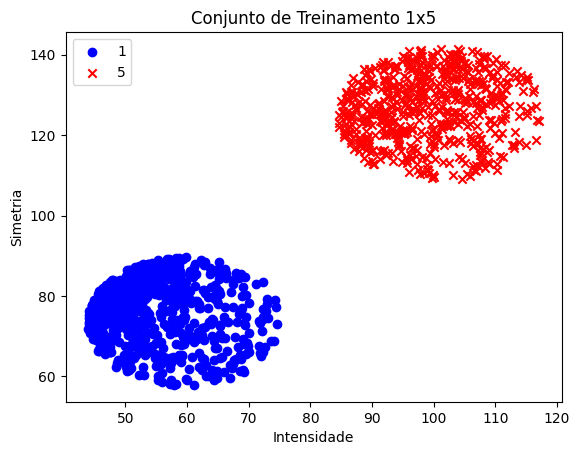

In [ ]:
plt.scatter(train1x5[train1x5['label'] == 1]['intensidade'],
            train1x5[train1x5['label'] == 1]['simetria'],
            c='blue', marker='o', label='1')  # Círculos azuis para a categoria 1

plt.scatter(train1x5[train1x5['label'] == 5]['intensidade'],
            train1x5[train1x5['label'] == 5]['simetria'],
            c='red', marker='x', label='5')  # Triângulos vermelhos para a categoria 5

plt.title('Conjunto de Treinamento 1x5')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')

plt.legend()

plt.show()

In [ ]:
train1x5.reset_index(drop=True, inplace=True)
train1x5.head()

,label,intensidade,simetria
0,1,44.701961,69.270588
1,1,59.850980,83.443137
2,1,48.552941,79.043137
3,1,69.435294,72.878431
4,1,51.541176,84.611765


In [ ]:
X_train1x5 = train1x5[['intensidade', 'simetria']]
y_train1x5 = train1x5['label']

In [ ]:
X_train1x5

,intensidade,simetria
0,44.701961,69.270588
1,59.850980,83.443137
2,48.552941,79.043137
3,69.435294,72.878431
4,51.541176,84.611765
...,...,...
1179,105.686275,133.890196
1180,113.050980,116.698039
1181,110.725490,133.019608
1182,99.305882,132.133333


In [ ]:
class LinearRegression:
  def __init__(self):
    self.w = None

  def fit(self, _X, _y):
    N = len(_X)

    X = np.column_stack((np.ones((N, 1)), _X))

    xtx = X.T @ X
    inv = np.linalg.inv(xtx) @ X.T
    self.w = inv @ _y

  def predict(self, _x):
    X = np.column_stack((np.ones((len(_x), 1)), _x))
    return [np.dot(self.w, xn) for xn in X]

  def getW(self):
    return self.w

In [ ]:
X_train1x5 = np.array(X_train1x5)
lr = LinearRegression()
lr.fit(X_train1x5, y_train1x5)
y_pred = lr.predict(X_train1x5)

In [ ]:
y_pred[0]

0.42722833097813284

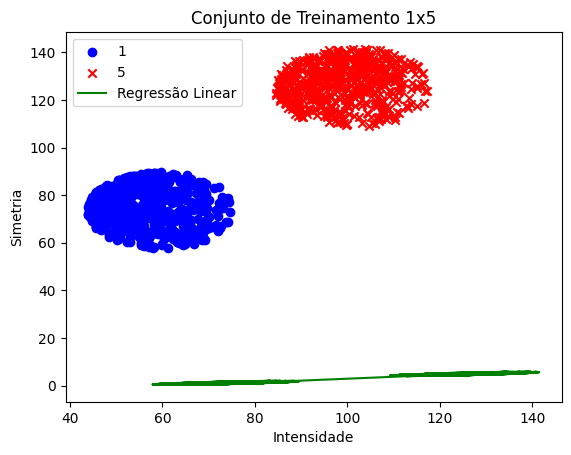

In [ ]:
plt.scatter(train1x5[train1x5['label'] == 1]['intensidade'],
            train1x5[train1x5['label'] == 1]['simetria'],
            c='blue', marker='o', label='1')  # Círculos azuis para a categoria 1

plt.scatter(train1x5[train1x5['label'] == 5]['intensidade'],
            train1x5[train1x5['label'] == 5]['simetria'],
            c='red', marker='x', label='5')  # Triângulos vermelhos para a categoria 5


plt.title('Conjunto de Treinamento 1x5')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')

plt.legend()

plt.show()